In [ ]:
# quando a observação de teste possuir zscore maior ou menor que 3 ou -3, limitar a 3 ou -3

In [1]:
import numpy as np
import statsmodels.api as sm 
import pylab as py   
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st

df = pd.read_pickle('treino.pkl.gz')

def year_to_age(x):

    if x == '00':
        return 20   
    else:
        return (100 - int(x)) + 20
    
df['nascimento'] = df['nascimento'].str[6:].apply(lambda x: year_to_age(x))

def quantile_transformation(series, x):
    
    sorted_series = series.sort_values()
    mean = np.mean(series)
    std = np.std(series)
    z_score = (x - mean) / std
    
    return z_score

def my_qq_plot(dataframe, series_name, n_samples, normal, seed):
    
    series = dataframe[series_name] 

    teste_series = series.sample(n_samples, random_state = seed)
    teste_series = teste_series.apply(lambda x: quantile_transformation(teste_series, x))
    teste_series = teste_series.sort_values()

    normal_prob_step = 100 / n_samples

    count = 0 
    prob_list = []
    for i in range(n_samples):
        prob_list.append(count  * (10 ** -2))
        count += normal_prob_step

    prob_series = pd.Series(prob_list)
    prob_series = prob_series.apply(lambda x: st.norm.ppf(x))

    prob_series = prob_series.to_frame()
    prob_series[0] = prob_series[0].replace(np.NINF, -3)
    prob_series[0] = prob_series[0].replace(np.inf, 3)
    x1 = prob_series[0]

    teste_series = teste_series.reset_index().drop('index', axis = 1)
    x2 = teste_series[series_name]

    plt.scatter(x1, x2, alpha = 0.2)
    plt.plot([-3, 3], [-3, 3], ls = ':', color = 'purple')
    plt.show()
    
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (16, 8)
seed = 0

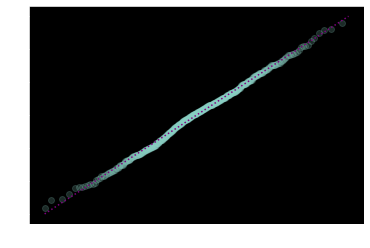

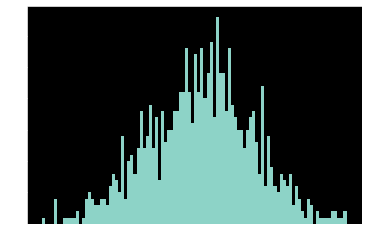

In [2]:
# gerar normal para teste
df_0 = pd.DataFrame(np.random.normal(0,1, 1000))

my_qq_plot(df_0, 0, 500, np.random.normal(0, 1, 1000), seed)
plt.hist(df_0[0], bins = 100)
plt.show()

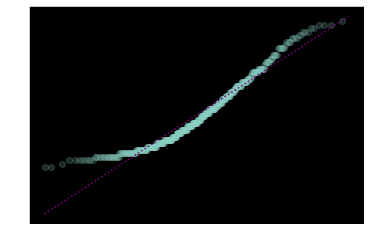

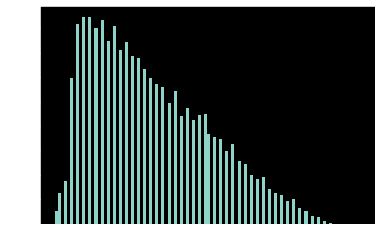

In [3]:
my_qq_plot(df, 'nascimento', 500, np.random.normal(0,1, 1000), seed)
plt.hist(df['nascimento'], bins = 100)
plt.show()

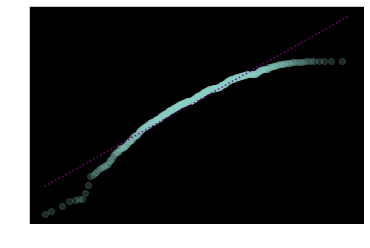

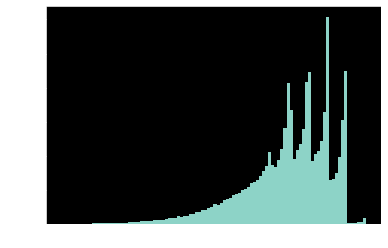

In [4]:
my_qq_plot(df, 'emprestimo_custo', 500, np.random.normal(0,1, 1000), seed)
plt.hist(df['emprestimo_custo'], bins = 100)
plt.show()